In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB as GB 
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("D:\Data Science\Assignment\Assignment 12\SalaryData_Train.csv")
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<Axes: xlabel='Salary', ylabel='count'>

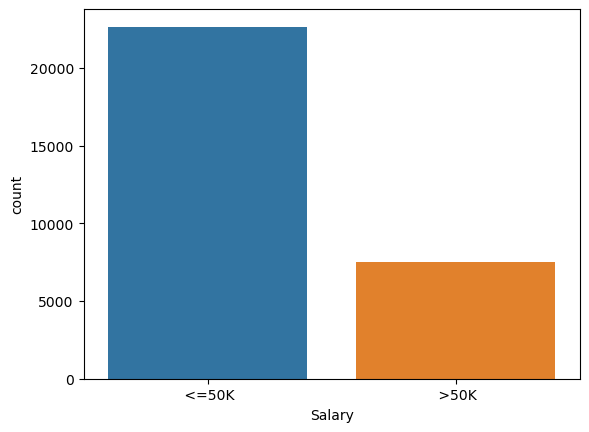

In [3]:
sns.countplot(x=data['Salary'])

In [4]:
le = LabelEncoder()
data['Salary'] = le.fit_transform(data['Salary'])
data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [5]:
data = pd.get_dummies(data=data, columns= ['workclass','education','maritalstatus','occupation','relationship','race','sex','native'])
data = data.astype(int)

In [6]:
x_train = data.drop(columns='Salary',inplace=False)
y_train = data['Salary']

In [9]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
pred = model.predict(x_train)


In [15]:
from sklearn.metrics import classification_report

prediction = model.predict(x_train)
report = classification_report(y_train, prediction)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86     22653
           1       0.57      0.81      0.67      7508

    accuracy                           0.80     30161
   macro avg       0.75      0.81      0.77     30161
weighted avg       0.84      0.80      0.81     30161

